In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("filtered_cases.csv")
print("Dataset shape:", df.shape)
df["full_text"] = df["catchphrases"].fillna("") + " " + df["text"].fillna("")

Dataset shape: (1888, 7)


In [ ]:
X = df["full_text"]
y = df["Category"]  # classification target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
vectorizer = TfidfVectorizer(
    stop_words="english", max_features=10000, ngram_range=(1,2)
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
clf = LogisticRegression(max_iter=200, class_weight="balanced")
clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [ ]:
y_pred = clf.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                                          precision    recall  f1-score   support

                Compensation & Insurance       0.72      0.87      0.79        15
                  Corporate & Insolvency       0.77      0.75      0.76        32
Employment, Unions & Workplace Relations       0.87      0.72      0.79        18
              Environment & Conservation       0.82      1.00      0.90         9
                 General Civil Procedure       0.60      0.71      0.65        21
               Immigration & Citizenship       0.99      0.97      0.98       181
                   Intellectual Property       0.88      0.88      0.88        26
                                   Other       0.75      1.00      0.86         3
           Property, Land & Native Title       0.94      0.89      0.91        36
                      Taxation & Finance       0.92      0.92      0.92        37

                                accuracy                           0.90 

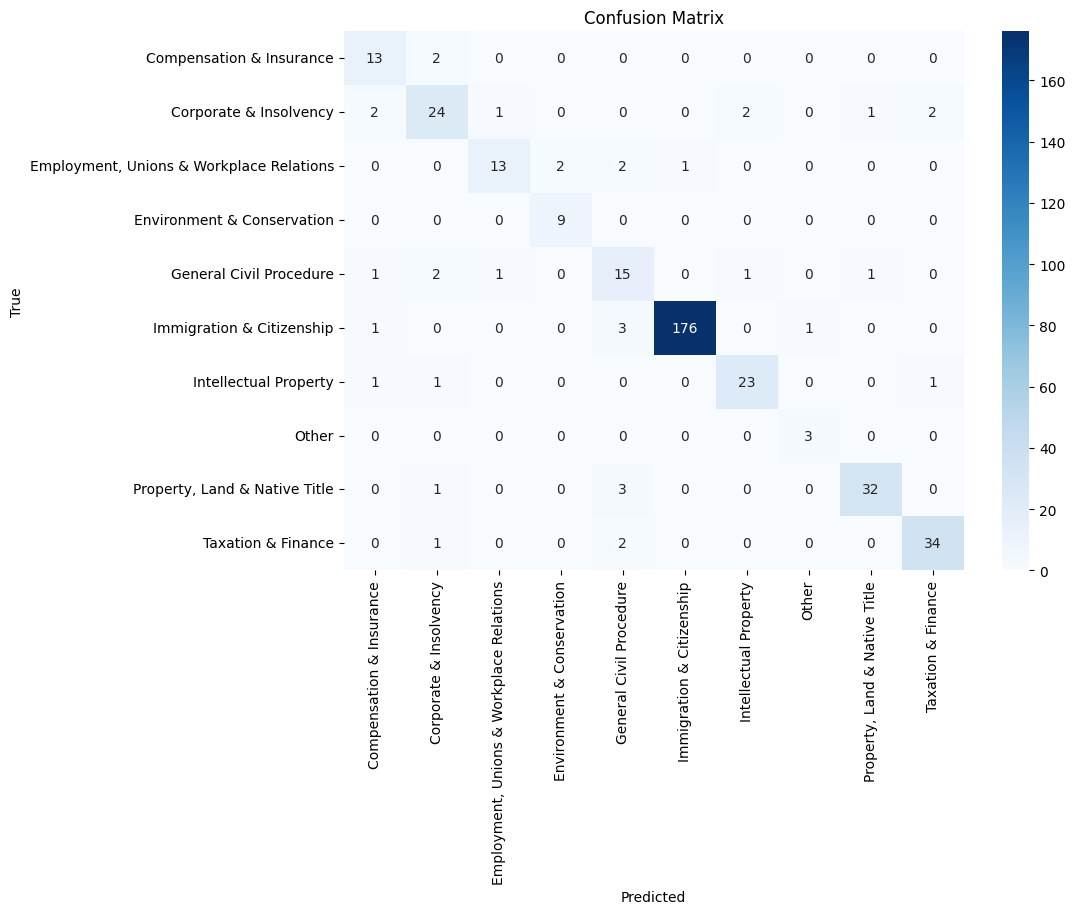

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
example = ["This case concerns unlawful discrimination and administrative review."]
example_tfidf = vectorizer.transform(example)
print("Predicted Category:", clf.predict(example_tfidf)[0])

Predicted Category: General Civil Procedure
